# Machine Learning Project -1   (Linear Regression)

## Problem Statement : 

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.

## Data Description:

Variable | Definition

- record_ID : Unique ID for each week store sku combination
- week : Starting Date of the week
- store_id : Unique ID for each store (no numerical order to be assumed)
- sku_id : Unique ID for each product (no numerical order to be assumed)
- total_price : Sales Price of the product
- base_price :  Base price of the product
- is_featured_sku : Was part of the featured item of the week
- is_display_sku : Product was on display at a prominent place at the store
- units_sold : (Target) Total Units sold for that week-store-sku combination

## Evaluation Metric:

- The evaluation metric is 100*RMSLE (Root Mean Squared Log Error).
- The basic objective is to implement the project with linear regression and comes up with as much accuracy we can . 

# Exploratory Data Analysis

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import minmax_scale

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## Importing the sales dataset
df_train = pd.read_csv(r"C:\Users\Shree\Desktop\AV Task\ML Tasks\train_0irEZ2H.csv")
df_test = pd.read_csv(r"C:\Users\Shree\Desktop\AV Task\ML Tasks\test_nfaJ3J5.csv")

In [3]:
## Rename 'week' to 'date' column 
df_train.rename(columns={"week":"date"},inplace=True)
df_test.rename(columns={"week":"date"},inplace=True)

In [4]:
df_train.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [5]:
df_test.head()

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [6]:
## Check dataframe dimensions
df_train.shape,df_test.shape

((150150, 9), (13860, 8))

In [7]:
## Get a concise summary of a DataFrame.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   date             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [8]:
# Change datatype from object to date 
df_train["date"] = pd.to_datetime(df_train["date"])

# Change the datatype from int64 to categrical
df_train["is_featured_sku"] = df_train["is_featured_sku"].astype("category")
df_train["is_display_sku"] = df_train["is_display_sku"].astype("category")

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   date             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  int64         
 3   sku_id           150150 non-null  int64         
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  category      
 7   is_display_sku   150150 non-null  category      
 8   units_sold       150150 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(4)
memory usage: 8.3 MB


In [10]:
## Generate descriptive statistics.
df_train.describe()

,record_ID,store_id,sku_id,total_price,base_price,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,2876.000000


In [11]:
## Generate descriptive statistics for categorical data.
df_train.describe(include='category')

,is_featured_sku,is_display_sku
count,150150,150150
unique,2,2
top,0,0
freq,135794,130150


## Missing Values

In [12]:
df_train.isnull().sum()

record_ID          0
date               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [13]:
# Drop null row as there is only one null value 
df_train.dropna(axis = 0,inplace=True)

In [14]:
df_train.shape

(150149, 9)

In [15]:
df_train

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12


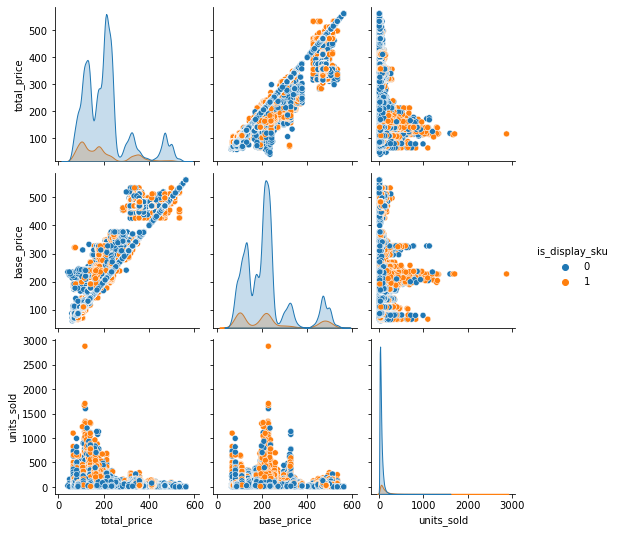

In [16]:
sns.pairplot(data=df_train,vars=["total_price","base_price","units_sold"],hue="is_display_sku")

Observation:
1. base_price and total_price are highly positively correlated features so we have to drop one of them as it can impact performance of linear models (Multicollinearity).
2. When total_price is low units_sold is high and it decreasing as total_price increases.

<AxesSubplot:xlabel='is_display_sku', ylabel='units_sold'>

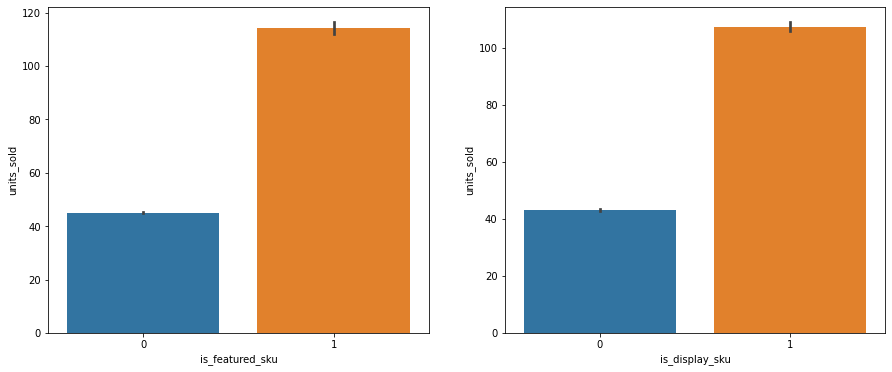

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x = "is_featured_sku",y = "units_sold",data = df_train)
plt.subplot(1,2,2)
sns.barplot(x = "is_display_sku",y = "units_sold",data = df_train)

In [18]:
df_train.groupby("is_featured_sku")["units_sold"].mean()

is_featured_sku
0     45.062654
1    114.216216
Name: units_sold, dtype: float64

In [19]:
df_train.groupby("is_display_sku")["units_sold"].mean()

is_display_sku
0     43.115045
1    107.375050
Name: units_sold, dtype: float64

Observation:
1. Units sold of those products which featured are more compare to non featured.
2. If product was on display at a prominent place at the store then average units sold for that product is more compare to non display products.

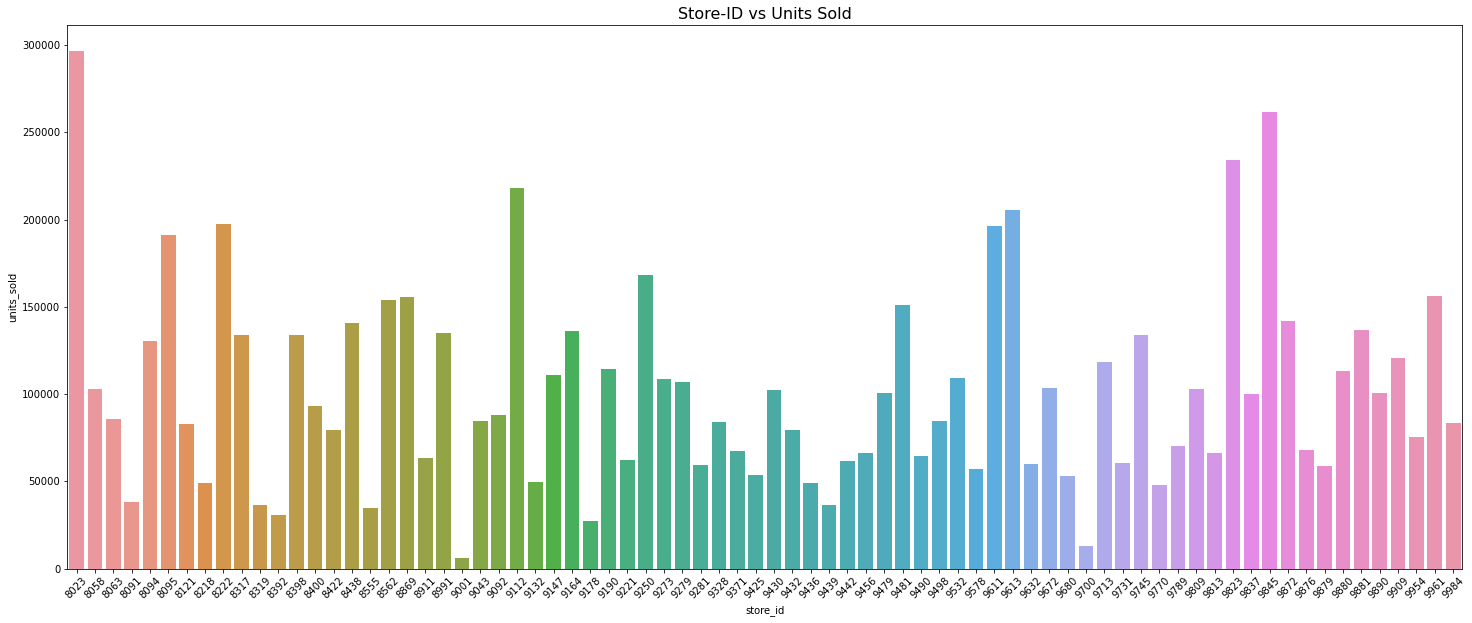

In [20]:
df1 = df_train.groupby('store_id').agg({'units_sold':'sum'}).sort_values(by=["units_sold"],ascending=False)
df2 = df_train.groupby('sku_id').agg({'units_sold':'sum'}).sort_values(by=["units_sold"],ascending=False)

plt.figure(figsize=(25,10))
sns.barplot(x = df1.index, y = df1["units_sold"], data = df1)
plt.xticks(rotation = 45)
plt.title('Store-ID vs Units Sold',fontsize=16)
plt.show()

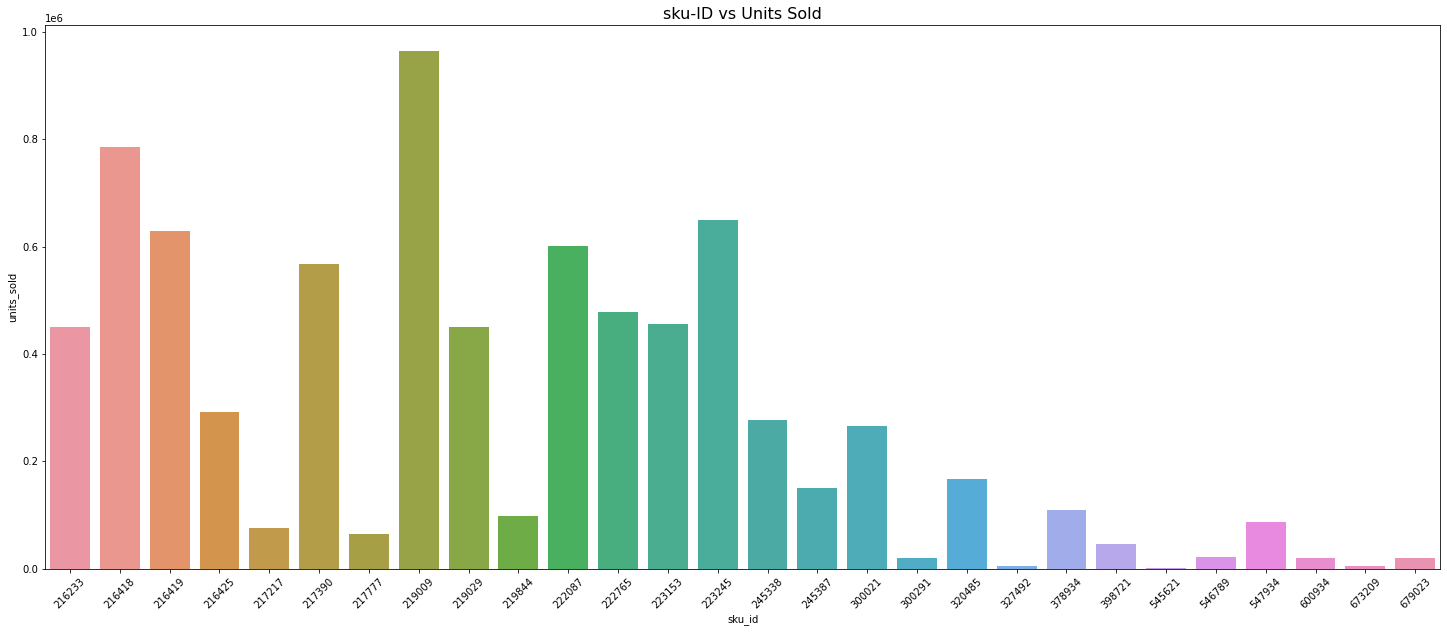

In [21]:
plt.figure(figsize=(25,10))
sns.barplot(x = df2.index, y = df2["units_sold"], data = df2)
plt.xticks(rotation  = 45)
plt.title('sku-ID vs Units Sold',fontsize=16)
plt.show()

## Feature Analysis

In [22]:
df_train.shape

(150149, 9)

In [23]:
# record_ID is just unique column better to drop it.
df_train["record_ID"].nunique()

150149

In [24]:
df_train.drop(columns=["record_ID"],axis=1,inplace=True)

In [25]:
df_train["store_id"].unique()

array([8091, 8095, 8094, 8063, 8023, 8058, 8222, 8121, 8218, 8317, 8319,
       8392, 8398, 8400, 8422, 8438, 8555, 8562, 8869, 8991, 8911, 9001,
       9043, 9092, 9112, 9132, 9147, 9164, 9178, 9190, 9221, 9250, 9273,
       9279, 9281, 9328, 9371, 9442, 9430, 9439, 9425, 9432, 9436, 9456,
       9479, 9481, 9490, 9498, 9532, 9578, 9672, 9611, 9613, 9632, 9680,
       9700, 9713, 9731, 9745, 9770, 9789, 9813, 9823, 9837, 9809, 9845,
       9872, 9876, 9879, 9880, 9881, 9890, 9909, 9954, 9961, 9984],
      dtype=int64)

In [26]:
df_train["sku_id"].unique()

array([216418, 216419, 216425, 216233, 217390, 219009, 219029, 223245,
       223153, 300021, 219844, 222087, 320485, 378934, 222765, 245387,
       245338, 547934, 300291, 217217, 217777, 398721, 679023, 546789,
       600934, 545621, 673209, 327492], dtype=int64)

In [27]:
## Convert datatype of store_id & sku_id from 'int64' to 'category
df_train["store_id"] = df_train["store_id"].astype("category")
df_train["sku_id"] = df_train["sku_id"].astype("category")

## Outlier Treatment

In [28]:
df_train.select_dtypes(["int64","float64"]).columns

Index(['total_price', 'base_price', 'units_sold'], dtype='object')

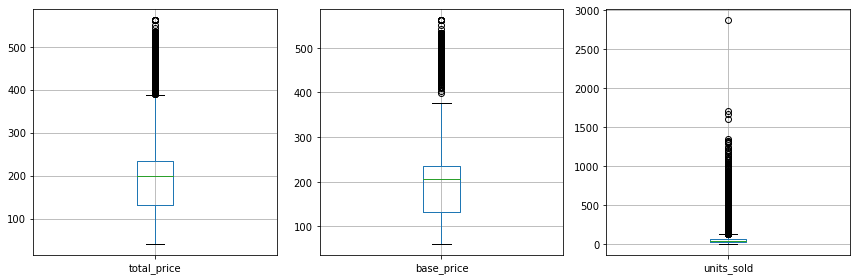

In [29]:
num_columns = ['total_price', 'base_price', 'units_sold']

## Check for outliers for all numerical features using boxplot.
plt.figure(figsize=(12,4))
for feature, i in zip(num_columns,range(1,4)):
    plt.subplot(1,3,i)
    df_train.boxplot(column=feature)
    plt.tight_layout() 

### Percentile Method

- Replace values above upper whisker with 95-98 percentile value by doing iteration for best value.
- Replace values below lower whisker with 3-5 percentile value by doing iteration for best value.

### Handling upper whisker outliers

In [30]:
upper=['total_price', 'base_price','units_sold']

for feature in upper:
    p_95 = np.percentile(df_train[feature], 95)
    df_train.loc[df_train[feature] > p_95, feature] = p_95

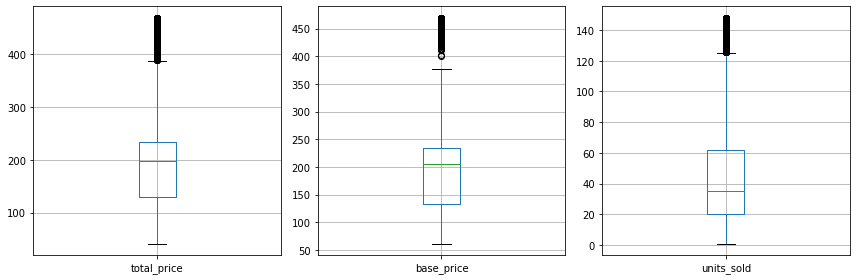

In [31]:
## Check after outlier treatment
plt.figure(figsize=(12,4))
for feature, i in zip(num_columns,range(1,4)):
    plt.subplot(1,3,i)
    df_train.boxplot(column=feature)
    plt.tight_layout() 

Observation:
- After outlier treatment using percentile method there is reduction in outliers in all features but still there are some outliers are present but we can proceed with that to analyze further.

## Multicollinearity

In [32]:
## Show the correlation between numericals features.
df_train[["total_price","base_price","units_sold"]].corr()

,total_price,base_price,units_sold
total_price,1.000000,0.961549,-0.298492
base_price,0.961549,1.000000,-0.205876
units_sold,-0.298492,-0.205876,1.000000


<AxesSubplot:>

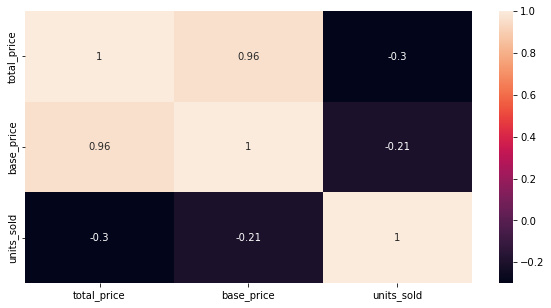

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train[["total_price","base_price","units_sold"]].corr(),annot=True)

### variance_inflation_factor

- The variance inflation factor is a measure for the increase of the variance of the parameter estimates if an additional variable is added to the linear regression. 
- Among two features whichever having higher VIF value remove(ignore) that feature as its the reductant feature.
- If VIF > 5, then the explanatory variable is highly collinear with the other explanatory variables, and the parameter estimates will have large standard errors because of this.

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
df_num = df_train[['total_price', 'base_price','units_sold']].values
df_num

array([[ 99.0375, 111.8625,  20.    ],
       [ 99.0375,  99.0375,  28.    ],
       [133.95  , 133.95  ,  19.    ],
       ...,
       [357.675 , 469.5375,  31.    ],
       [141.7875, 191.6625,  12.    ],
       [234.4125, 234.4125,  15.    ]])

In [36]:
vif = pd.DataFrame()  ## Create empty dataframe
vif["variables"] = ['total_price', 'base_price','units_sold']
vif["VIF"] = [variance_inflation_factor(df_num, i) for i in range(3)]
vif

,variables,VIF
0,total_price,70.064049
1,base_price,73.719891
2,units_sold,1.780139


Observation:
- VIF(total_price) > VIF(base_price)
- total_proce and base_price are highly correlated (96%) which means we have to drop feature having higher VIF value as both giving almost same information.

In [37]:
df_train.drop(columns=["total_price"],axis=1,inplace=True)

## Feature Engineering

In [38]:
df_train["year"] = df_train["date"].dt.year
df_train["month"] = df_train["date"].dt.month
df_train["week"] = df_train["date"].dt.week
df_train["day"] = df_train["date"].dt.day
df_train["weekday"] = df_train["date"].dt.dayofweek # 0 - Monday & 6 - Sunday
df_train["dayname"] = df_train["date"].dt.day_name()
df_train['is_weekend'] = np.where(df_train['weekday'].isin([5,6]),1,0)

In [39]:
df_train

,date,store_id,sku_id,base_price,is_featured_sku,is_display_sku,units_sold,year,month,week,day,weekday,dayname,is_weekend
0,2011-01-17,8091,216418,111.8625,0,0,20,2011,1,3,17,0,Monday,0
1,2011-01-17,8091,216419,99.0375,0,0,28,2011,1,3,17,0,Monday,0
2,2011-01-17,8091,216425,133.9500,0,0,19,2011,1,3,17,0,Monday,0
3,2011-01-17,8091,216233,133.9500,0,0,44,2011,1,3,17,0,Monday,0
4,2011-01-17,8091,217390,141.0750,0,0,52,2011,1,3,17,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,2013-09-07,9984,223245,235.8375,0,0,38,2013,9,36,7,5,Saturday,1
150146,2013-09-07,9984,223153,235.8375,0,0,30,2013,9,36,7,5,Saturday,1
150147,2013-09-07,9984,245338,469.5375,1,1,31,2013,9,36,7,5,Saturday,1
150148,2013-09-07,9984,547934,191.6625,0,1,12,2013,9,36,7,5,Saturday,1


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150149 entries, 0 to 150149
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date             150149 non-null  datetime64[ns]
 1   store_id         150149 non-null  category      
 2   sku_id           150149 non-null  category      
 3   base_price       150149 non-null  float64       
 4   is_featured_sku  150149 non-null  category      
 5   is_display_sku   150149 non-null  category      
 6   units_sold       150149 non-null  int64         
 7   year             150149 non-null  int64         
 8   month            150149 non-null  int64         
 9   week             150149 non-null  int64         
 10  day              150149 non-null  int64         
 11  weekday          150149 non-null  int64         
 12  dayname          150149 non-null  object        
 13  is_weekend       150149 non-null  int32         
dtypes: category(4), date

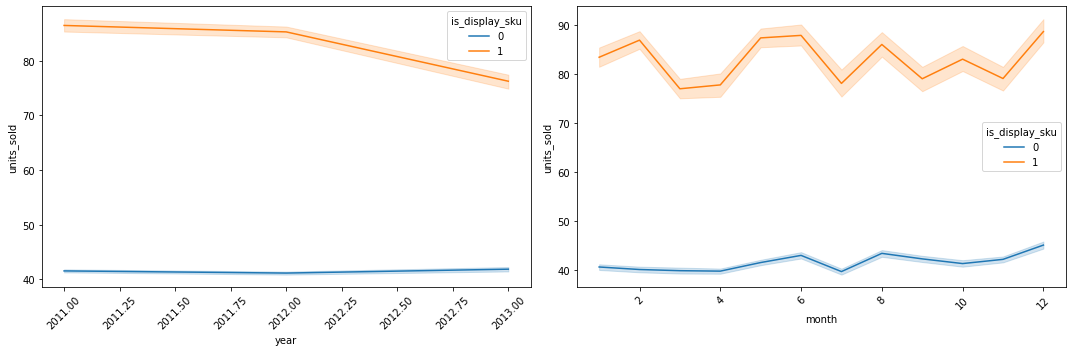

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(x = 'year',y = "units_sold",hue='is_display_sku',data=df_train)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.lineplot(x = 'month',y = "units_sold",hue='is_display_sku',data=df_train)
plt.xticks(rotation = 45)

plt.tight_layout()

Observation:
1. There has been decline in sales of sku products from 2011 to 2013 for products display at stores while sales for non display sku products is almost stagnant.
2. We can see zigazag (increase then decrease ) trend for monthwise sales for sku products.

In [42]:
df_train.groupby("dayname")["units_sold"].mean().sort_values(ascending=False)

dayname
Thursday     48.561645
Monday       48.206371
Sunday       47.832777
Tuesday      46.197024
Friday       44.704762
Saturday     44.481014
Wednesday    43.161039
Name: units_sold, dtype: float64

Text(0.5, 1.0, 'Weekday vs Units sold')

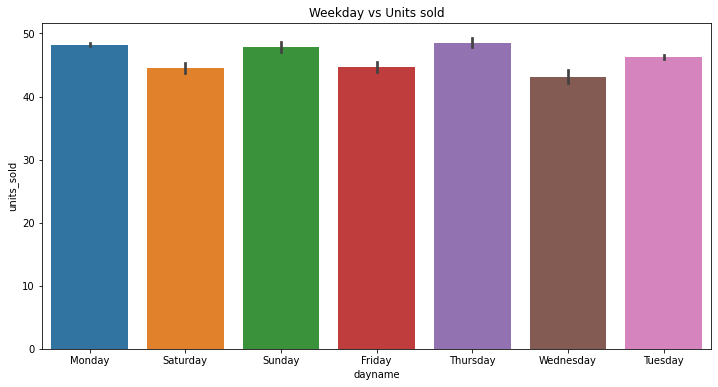

In [43]:
plt.figure(figsize=(12,6))
sns.barplot(x = "dayname",y = "units_sold",data = df_train)
plt.title("Weekday vs Units sold")

Observation:
- Average sales of sku products is max on thursday followed by monday then sunday while lowest for wednesday.

## Feature Distribution

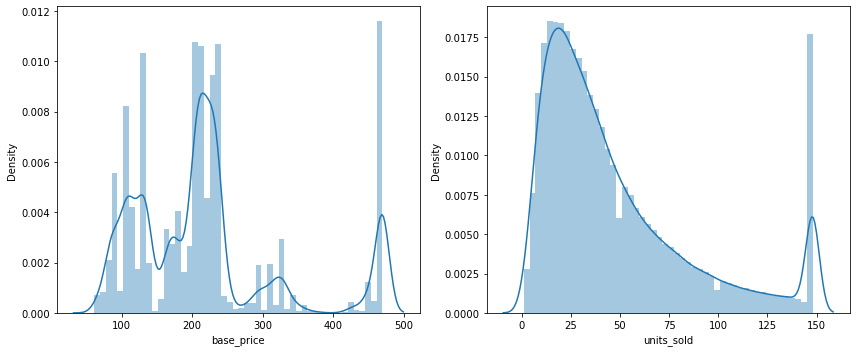

In [44]:
plt.figure(figsize=(12,5))
for feature,i in zip(["base_price","units_sold"],range(1,3)):
    plt.subplot(1,2,i)
    sns.distplot(df_train[feature],kde=True)
    plt.tight_layout()

## Data Preprocessing (Encoding)

In [45]:
df_train

,date,store_id,sku_id,base_price,is_featured_sku,is_display_sku,units_sold,year,month,week,day,weekday,dayname,is_weekend
0,2011-01-17,8091,216418,111.8625,0,0,20,2011,1,3,17,0,Monday,0
1,2011-01-17,8091,216419,99.0375,0,0,28,2011,1,3,17,0,Monday,0
2,2011-01-17,8091,216425,133.9500,0,0,19,2011,1,3,17,0,Monday,0
3,2011-01-17,8091,216233,133.9500,0,0,44,2011,1,3,17,0,Monday,0
4,2011-01-17,8091,217390,141.0750,0,0,52,2011,1,3,17,0,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,2013-09-07,9984,223245,235.8375,0,0,38,2013,9,36,7,5,Saturday,1
150146,2013-09-07,9984,223153,235.8375,0,0,30,2013,9,36,7,5,Saturday,1
150147,2013-09-07,9984,245338,469.5375,1,1,31,2013,9,36,7,5,Saturday,1
150148,2013-09-07,9984,547934,191.6625,0,1,12,2013,9,36,7,5,Saturday,1


In [46]:
## One Hot Encoding of categorical columns
df_final = pd.get_dummies(data=df_train,columns=["store_id","sku_id"],drop_first=True)

# Linear Regression Model Building

In [47]:
df_final

,date,base_price,is_featured_sku,is_display_sku,units_sold,year,month,week,day,weekday,...,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023
0,2011-01-17,111.8625,0,0,20,2011,1,3,17,0,...,0,0,0,0,0,0,0,0,0,0
1,2011-01-17,99.0375,0,0,28,2011,1,3,17,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-17,133.9500,0,0,19,2011,1,3,17,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-17,133.9500,0,0,44,2011,1,3,17,0,...,0,0,0,0,0,0,0,0,0,0
4,2011-01-17,141.0750,0,0,52,2011,1,3,17,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,2013-09-07,235.8375,0,0,38,2013,9,36,7,5,...,0,0,0,0,0,0,0,0,0,0
150146,2013-09-07,235.8375,0,0,30,2013,9,36,7,5,...,0,0,0,0,0,0,0,0,0,0
150147,2013-09-07,469.5375,1,1,31,2013,9,36,7,5,...,0,0,0,0,0,0,0,0,0,0
150148,2013-09-07,191.6625,0,1,12,2013,9,36,7,5,...,0,0,0,0,0,0,1,0,0,0


## Spliting features & target values

In [48]:
#df_inal.set_index('date',inplace=True)
#f_final.sort_index(inplace=True)
x = df_final.drop(columns=["date","dayname","units_sold"],axis=1)
y = df_final["units_sold"]

In [49]:
x.shape , y.shape

((150149, 111), (150149,))

## Splitting dataset into training & validation data

In [50]:
x_train,x_valid,y_train,y_valid =train_test_split(x,y,test_size=0.3,random_state=2)

### Time Series Splitting

In [51]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 3)

In [52]:
#for train_index, valid_index in tss.split(x):
    #x_train, x_valid = x.iloc[train_index, :], x.iloc[valid_index,:]
    #y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

In [53]:
x_train.shape , x_valid.shape

((105104, 111), (45045, 111))

## Scaling Data (Standardization)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)

In [56]:
x_train

array([[-0.73437718, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-1.00595763, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-0.37668585, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       ...,
       [-0.82048805, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [ 2.33911864, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-0.09185758, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073]])

## Linear Regression Model Building

In [57]:
## Creating instance model of linear regression class
model_lr = linear_model.LinearRegression(n_jobs=-1)

## Fit the training data
model_lr.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [58]:
## Predict values using train data
y_train_predict = model_lr.predict(x_train).round().astype("int64")
y_train_predict

array([25, 58, 37, ..., 39, 38, 56], dtype=int64)

In [59]:
## Predict values using validation data
y_valid_predict = model_lr.predict(x_valid).round().astype("int64")
y_valid_predict

array([39, 29, 51, ..., 16, 33, 87], dtype=int64)

## Linear Regression Model Evaluation

In [60]:
## Use minmax scale to sweeze predicted values between 0-1 so that we can calculate squared log error
y_train_scale = minmax_scale(y_train,feature_range=(0,1))
y_valid_scale = minmax_scale(y_valid,feature_range=(0,1))
y_train_pred_scale = minmax_scale(y_train_predict,feature_range=(0, 1))
y_valid_pred_scale = minmax_scale(y_valid_predict,feature_range=(0, 1))

In [61]:
rmsle_train = np.sqrt(mean_squared_log_error(y_train_scale,y_train_pred_scale)) # Train RMSLE
rmsle_valid = np.sqrt(mean_squared_log_error(y_valid_scale,y_valid_pred_scale)) # Validation RMSLE
r2_train= r2_score(y_train, y_train_predict) 
r2_valid = r2_score(y_valid, y_valid_predict)

In [62]:
print('Weights:' ,model_lr.coef_)

Weights: [-12.6986401    9.43032282   9.55870939   0.07601094   0.8741924
  -0.06784891  -0.48963981  -1.63502133   1.06651187  -4.71846638
  -7.010103    -6.0703025   -6.49348193  -2.3720338   -6.77544281
  -7.30381531  -1.61112985  -4.69899267  -6.31584798  -6.8950501
  -4.32802242  -5.4546669   -6.01148736  -5.5033577   -7.26918951
  -3.89822661  -3.56277398  -7.35488     -5.85720568  -3.19369453
  -5.85934242  -6.94381533  -1.72984216  -5.99328933  -3.79408164
  -4.44965959  -4.81451195  -4.89231655  -6.75484837  -3.69844503
  -6.90589608  -6.89658738  -6.95609685  -7.22753132  -6.0277448
  -7.27238176  -5.3663746   -7.40875861  -6.77695435  -6.46671189
  -5.37112836  -7.20629659  -6.61516806  -2.27611141  -6.7125219
  -5.74463943  -6.1773185   -5.51050967  -2.36104323  -2.63626145
  -7.0405441   -4.73664765  -7.66530784  -5.75801265  -4.55752865
  -5.5613226   -4.26449122  -6.45958818  -6.6450318   -4.14714312
  -6.93533728  -1.72049123  -5.12812405  -0.15693988  -4.91837249
  -6.

In [63]:
print('Intercept:',model_lr.intercept_)

Intercept: 46.96635713198355


In [64]:
print('Linear Regression model:')
print('Train error(RMSLE):', rmsle_train)
print('Validation error(RMSLE):', rmsle_valid)
print('Train R2-score:', r2_train)
print('Validation R2-score:',r2_valid)

Linear Regression model:
Train error(RMSLE): 0.1291833446550248
Validation error(RMSLE): 0.12866023765045997
Train R2-score: 0.609311236644243
Validation R2-score: 0.6131245257433064


Conclusion:
1. Root Mean Squared Log Error (RMSLE * 100) : Training Data    ----> 12.92
2. Root Mean Squared Log Error (RMSLE * 100) : Validation Data  ----> 12.87

## Feature Importance

In [65]:
df_featureimp = pd.DataFrame({"Feature":x.columns,"Weight_coefficient":(abs(model_lr.coef_))})
df_featureimp = df_featureimp.sort_values(by=["Weight_coefficient"],ascending=False)
df_featureimp.head(20)

,Feature,Weight_coefficient
0,base_price,12.698640
2,is_display_sku,9.558709
90,sku_id_219009,9.439182
1,is_featured_sku,9.430323
62,store_id_9680,7.665308
47,store_id_9432,7.408759
27,store_id_8911,7.354880
15,store_id_8218,7.303815
45,store_id_9425,7.272382
24,store_id_8555,7.269190


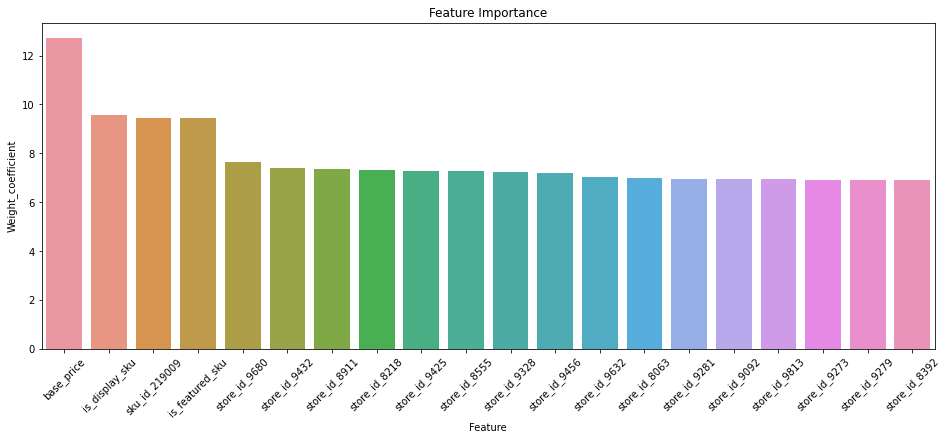

In [66]:
plt.figure(figsize=(16,6))
sns.barplot(x = 'Feature',y = 'Weight_coefficient',data = df_featureimp.head(20))
plt.title("Feature Importance")
plt.xticks(rotation = 45)
plt.show()

## Model Pipeline (Test Data)

In [67]:
df_test

,record_ID,date,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0
...,...,...,...,...,...,...,...,...
13855,232281,01/10/13,9984,223245,241.5375,241.5375,0,0
13856,232282,01/10/13,9984,223153,240.8250,240.8250,0,0
13857,232285,01/10/13,9984,245338,382.6125,401.8500,1,1
13858,232286,01/10/13,9984,547934,191.6625,191.6625,0,0


In [68]:
df_test.shape

(13860, 8)

In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   date             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


In [70]:
df_test["date"] = pd.to_datetime(df_test["date"])
df_test["store_id"] = df_test["store_id"].astype("category")
df_test["sku_id"] = df_test["sku_id"].astype("category")
df_test["is_featured_sku"] = df_test["is_featured_sku"].astype("category")
df_test["is_display_sku"] = df_test["is_display_sku"].astype("category")

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   record_ID        13860 non-null  int64         
 1   date             13860 non-null  datetime64[ns]
 2   store_id         13860 non-null  category      
 3   sku_id           13860 non-null  category      
 4   total_price      13860 non-null  float64       
 5   base_price       13860 non-null  float64       
 6   is_featured_sku  13860 non-null  category      
 7   is_display_sku   13860 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(2), int64(1)
memory usage: 491.5 KB


In [72]:
df_test.isnull().sum()

record_ID          0
date               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [73]:
def model_testdata_func(df):
    ## Drop the record_ID & total_price column 
    df.drop(columns = ["record_ID","total_price"],axis=1,inplace=True)
    
    ## Feature Extarction
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["week"] = df["date"].dt.week
    df["day"] = df["date"].dt.day
    df["weekday"] = df["date"].dt.dayofweek # 0 - Monday & 6 - Sunday
    df['is_weekend'] = np.where(df['weekday'].isin([5,6]),1,0)
    
    ## One Hot Encoding of categorical columns
    df_final = pd.get_dummies(data=df,columns=["store_id","sku_id"],drop_first=True)
    df_final = df_final.drop(columns="date",axis=1)    
    
    ## Standaridization
    x_test = scaler.transform(df_final)
    
    return x_test

In [74]:
x_test = model_testdata_func(df_test)
x_test

array([[-1.01920545, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-1.01258154, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-0.78074457, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       ...,
       [ 1.70984687,  3.09021567,  2.5663199 , ..., -0.07802556,
        -0.04266797, -0.08851073],
       [-0.24420759, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, -0.08851073],
       [ 0.15322722, -0.32360201, -0.38966303, ..., -0.07802556,
        -0.04266797, 11.29806474]])

In [75]:
x_test.shape

(13860, 111)

## Test Data Prediction

In [76]:
y_test_predict = model_lr.predict(x_test).round().astype("int64")
y_test_predict

array([45, 34,  9, ..., 72, -5, -3], dtype=int64)

In [77]:
submission = pd.DataFrame({"Target":y_test_predict})
submission

,Target
0,45
1,34
2,9
3,23
4,32
...,...
13855,35
13856,27
13857,72
13858,-5
